In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [14]:
# Implementando a lógica XOR.

#N = 100
# Gerando os dados de entrada
#x1 = np.random.randint(0,2,N)
#x2 = np.random.randint(0,2,N)
x = np.array([[0,0],[0,1],[1,0],[1,1]])
#x = np.random.randn(N, 2)
#y = np.array(np.logical_xor(x[:, 0] > 0, x[:, 1] > 0), dtype=int)

In [15]:
# Adicionando ruído as entradas.

#x1 = x1 + 0.1*np.random.randn(N,)

#x2 = x2 + 0.1*np.random.randn(N,)

In [16]:
# Criando o vetor de 1s para o peso de bias.
#x0 = np.ones((N,))
#x = np.c_[x0,x1,x2]

In [17]:
y = np.array(np.logical_xor(x[:, 0] > 0, x[:, 1] > 0), dtype=int)

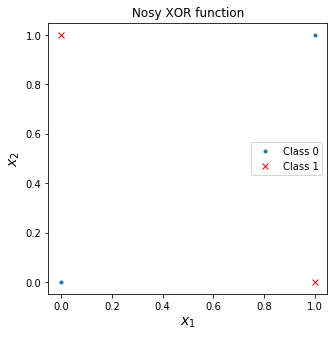

In [18]:
# Plotando as classes.

idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x[idx0,0], x[idx0,1], '.', label='Class 0')
plt.plot(x[idx1,0], x[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Nosy XOR function')
plt.legend()
plt.savefig('noisy_and_gate.png', dpi=600)
plt.show()

In [19]:
# Gerando o perceptron.

per = Perceptron(random_state=42).fit(x, y)

y_pred = per.predict(x)
        
error = mean_squared_error(y_pred, y)
print('MSE: ', error)

MSE:  0.5


In [21]:
clf = MLPClassifier(hidden_layer_sizes=(2,1), activation='logistic', random_state=4, max_iter=4000)

# Generate N binary symbols.
#V = np.random.randint(0,4,(N,1))
    
# Modulate binary stream into QPSK symbols.
#s = mod(V)
    
# Generate noise vector. 
# Divide by two once the theoretical ber uses a complex Normal pdf with variance of each part = 1/2.
#noise = np.sqrt(1.0/2.0)*(np.random.randn(N, 1) + 1j*np.random.randn(N, 1))
    
# Pass symbols through AWGN channel.
#y = s + np.sqrt(0.2)*noise
    
# Split array into random train and test subsets.
#s_test, s_train, y_test, y_train, v_test, v_train = train_test_split(s, y, V, random_state=0)
    
#Y = np.c_[y_train.real,y_train.imag]
    
# Fit models for real and imaginary parts.
clf.fit(x,y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(2, 1), learning_rate='constant',
              learning_rate_init=0.001, max_iter=4000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=4, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

TypeError: scatter() missing 1 required positional argument: 'y'

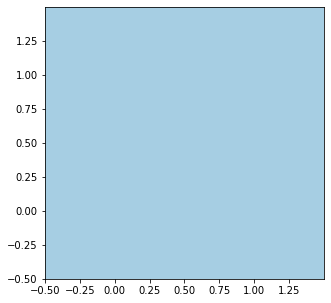

In [24]:
# Plotando as fronteiras de decisão.
x_min, x_max = x.min() - .5, x.max() + .5
y_min, y_max = x.min() - .5, x.max() + .5
h = .002  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = per.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x, c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title('Noisy AND function')
plt.savefig('noisy_and_gate_boundary.png', dpi=600)
plt.show()

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
x_train = np.c_[np.ones((len(y_train), 1)), x_train]
a = np.random.randn(x_train.shape[1],1)
x_test = np.c_[np.ones((len(y_test), 1)), x_test]
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
h = .02  
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
a_min = a
def error_function(x, a, y):    
    h = expit(x.dot(a))
    error = -(1/len(y))*np.sum( y.T.dot(np.log(h)) + (1-y).T.dot(np.log((1-h) )) )
    return error

def classifier(x, a):
    h = expit(x.dot(a))
    c = np.zeros((len(h), 1))
    for i in range(0, len(h)):
        if(h[i] >= 0.5):
            c[i,0]=1.0
    return c

def predict_prob(x, a):
    h1 = expit(x.dot(a))
    h0 = 1 - h1
    h = np.c_[h0, h1]
    return h

In [28]:
# Plotando a matriz de confusão.
y_pred_class = classifier(x_test, a_min)

fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y_test, y_pred_class)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

NameError: name 'expit' is not defined